In [43]:
import os
import sys
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.get_data_from_trafikkdata import get_data_from_trafikkdata
from src.data.get_data_from_vegkart import get_data_from_vegkart
from src.data.save_geodf_as_geojson_with_crs import save_geodf_as_geojson_with_crs
from nvdbapiv3 import nvdb2geojson

In [2]:
%%writefile nvdbapi-clientinfo.json
{ "X-Client" : "nvdbapi.py fra Nvdb gjengen, vegdirektoratet", 
 "X-Kontaktperson" : "kenneth.sorensen@vegvesen.no" }

Overwriting nvdbapi-clientinfo.json


In [70]:
#get the data for the year 2020
df = get_data_from_vegkart(570,"5055>='2020-01-01' AND 5055<='2020-12-31'")

In [71]:
df[['veg_kat_nr','vegident','meterering']] = df['kortform'].str.split(' ',2,expand=True)

In [76]:
# Expand 'vegsystem' column to enable filtering
#df_temp = pd.merge(df, pd.json_normalize(df['vegsystem']), left_index=True, right_index=True)

In [74]:
df_ulykker = df[[
    'geometry',
    'Ulykkestype (Ny)',
    'Ulykkesdato',
    'Måned (Ny)',
    'Ulykkesklokkeslett', 
    'Stedsforhold',
    'Føreforhold',
    'Værforhold',
    'Temperatur',
    'Fylkenavn (Ny)',
    'veg_kat_nr',
    'vegident',
    'meterering'
]]  

In [81]:
## Filter to only use E39
df_e39 = df_ulykker[df_ulykker['veg_kat_nr'] == 'EV39']

<AxesSubplot:xlabel='Ulykkestype (Ny)', ylabel='Count'>

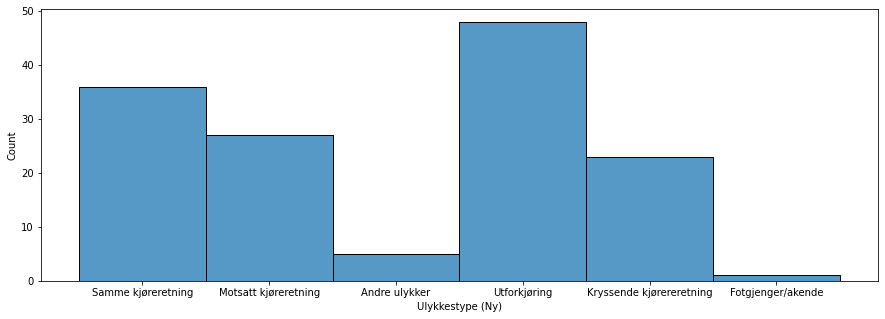

In [83]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df_e39, x='Ulykkestype (Ny)')

<AxesSubplot:xlabel='Måned (Ny)', ylabel='Count'>

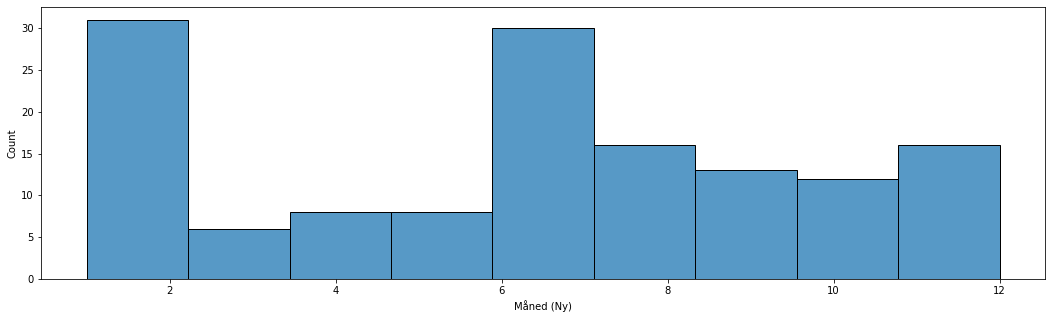

In [84]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df_e39, x='Måned (Ny)')

<AxesSubplot:xlabel='Temperatur', ylabel='Count'>

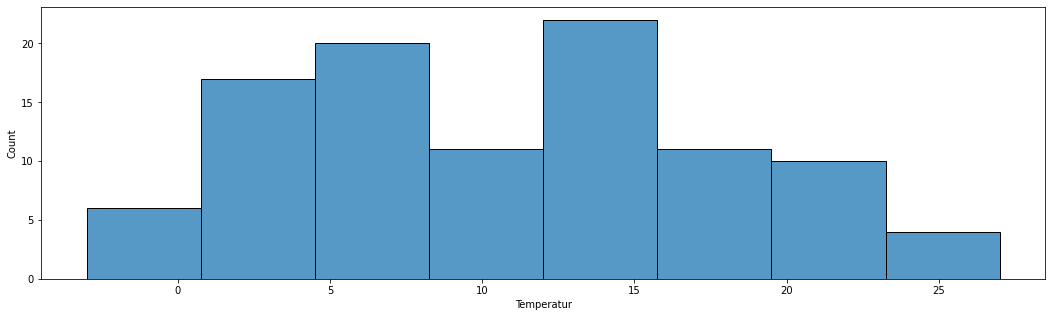

In [85]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df_e39, x='Temperatur')

<AxesSubplot:xlabel='Værforhold', ylabel='Count'>

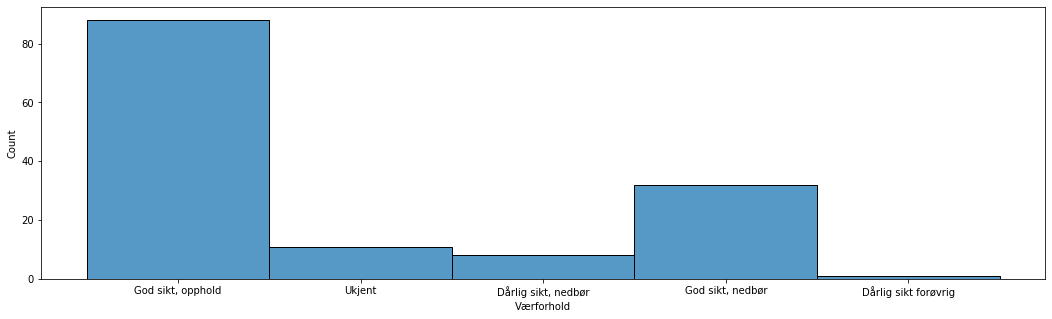

In [86]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df_e39, x='Værforhold')

In [87]:
df_e39.set_crs(epsg=25833)
save_geodf_as_geojson_with_crs(df_e39, "EPSG:25833", '../results/ulykker_e39.geojson')
save_geodf_as_geojson_with_crs(df_e39, "EPSG:25833", '../results/ulykker_e39.json')

In [47]:
!pwd

/home/kensor/data-science-template/notebooks
